DATA PREPROCESSING


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.special import factorial
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import scipy.stats as stats
from scipy.stats import ks_2samp
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.python import feature_column
from imblearn.under_sampling import RandomUnderSampler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
import scipy.integrate
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
df = pd.read_csv('/content/drive/MyDrive/AMML_dataset-_1_.csv')

In [111]:
# This removes all the missing data rows

for col in df.columns:
  df = df[df[col] != 0] # we are simply copying all rows which do not contain a null value.

for col in df.columns:
  df= df[df[col] != 'MD'] # similar as above we are copying all rows which do not contain a MDvalue

In [112]:
#converting certain columns to numeric data type
df['Quantitative Ability 1'] = pd.to_numeric(df['Quantitative Ability 1'])
df['Domain Skills 1'] = pd.to_numeric(df['Domain Skills 1'])
df['Analytical Skills 1'] = pd.to_numeric(df['Analytical Skills 1'])

In [113]:
label_encoder = preprocessing.LabelEncoder()

for column_name in df.columns:
  if df[column_name].dtypes == 'object':   #this chooses only those columns that are of type object
     df[column_name] = label_encoder.fit_transform(df[column_name])   #this is the encoding

In [114]:
df.head()

,Candidate ID,Name,Number of characters in Original Name,Month of Birth,Year of Birth,Gender,State (Location),10th percentage,12th percentage,10th Completion Year,...,Quantitative Ability 3,Quantitative Ability 4,Domain Skills 1,Domain Skills 2,Domain Test 3,Domain Test 4,Analytical Skills 1,Analytical Skills 2,Analytical Skills 3,Performance
0,5,209,18,7,6,1,0,90.30,96.00,4,...,47.486034,49.132948,21.428571,45.323741,43.448276,54.744526,60.000000,58.227848,72.413793,2
1,9,43,17,4,5,0,3,85.00,65.33,3,...,62.011173,53.757225,32.142857,52.517986,61.379310,51.824818,63.636364,37.974684,83.908046,1
2,13,335,10,0,6,1,0,77.40,81.80,4,...,76.536313,54.913295,58.928571,75.539568,71.034483,70.802920,70.909091,73.417722,70.114943,0
3,14,321,10,5,6,1,4,90.16,95.30,4,...,57.541899,46.820809,42.857143,71.223022,53.103448,56.204380,40.000000,65.822785,28.735632,0
4,15,234,12,9,5,0,0,86.50,85.40,4,...,57.541899,58.381503,46.428571,68.345324,55.862069,70.802920,76.363636,68.354430,79.310345,0


Problem 1:

Which independent variables can be used as inputs for a Neural Network or an SVM and why?

In [115]:
# Identify the dependent variable
y = df['Performance']

# Identify potential independent variables
X = df.select_dtypes(include=np.number).drop(['Performance'], axis=1)

# Calculate the correlation between the independent variables and the dependent variable
corr = X.corrwith(y)

# Remove any independent variables with a correlation coefficient less than a threshold
threshold = 0.01
X = X.loc[:, abs(corr) >= threshold]

# Use correlation-based feature selection to identify a subset of the most important independent variables
selector = SelectKBest(f_regression, k=6)
selector.fit(X, y)

# Get the indices of the selected independent variables
selected_indices = selector.get_support(indices=True)

# Get the names of the selected independent variables
selected_variables = X.columns[selected_indices]

# Print the selected independent variables
print(selected_variables)

Index(['Quantitative Ability 1', 'Quantitative Ability 2', 'Domain Skills 1',
       'Domain Skills 2', 'Domain Test 3', 'Domain Test 4'],
      dtype='object')


-----------------------------------------------------------------------------


Problem 2:

Convert the inputs identified in Q1 into standard form (zero mean and unit variance). Can all data points
be used? If not, then devise a strategy to deal with missing information for the rest of the assignment.

In [116]:
# Identify the columns to be scaled
columns_to_scale = ['Quantitative Ability 1', 'Quantitative Ability 2', 'Domain Skills 1']

# Create a StandardScaler object
scaler = preprocessing.StandardScaler()

# Scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Check the results
print(df.head())

   Candidate ID  Name  Number of characters in Original Name  Month of Birth  \
0             5   209                                     18               7   
1             9    43                                     17               4   
2            13   335                                     10               0   
3            14   321                                     10               5   
4            15   234                                     12               9   

   Year of Birth  Gender  State (Location)  10th percentage  12th percentage  \
0              6       1                 0            90.30            96.00   
1              5       0                 3            85.00            65.33   
2              6       1                 0            77.40            81.80   
3              6       1                 4            90.16            95.30   
4              5       0                 0            86.50            85.40   

   10th Completion Year  ...  Quantita

Problem 3:

Perform Kolmogorov-Smirnov test  to
rank the features according to their discrimination ability for classes BP and LP.

In [162]:
# Split the dataset into two groups based on the target variable
group1 = df[df['Performance'] == 1] #BP
group2 = df[df['Performance'] == 2] #LP

# Loop over each feature and perform the Kolmogorov-Smirnov test
p_values = []
for feature in df.columns[:-1]:  # Exclude the target variable
    stat, p = stats.ks_2samp(group1[feature], group2[feature])
    p_values.append((feature, p))

# Sort the p-values in ascending order and print the ranking
p_values.sort(key=lambda x: x[1])
for i, (feature, p) in enumerate(p_values):
    print(f"{i+1}. {feature}: {p:.4f}")
    p_values=np.array(p_values)

1. Quantitative Ability 1: 0.0602
2. Quantitative Ability 3: 0.1324
3. Candidate ID: 0.1578
4. Analytical Skills 1: 0.1858
5. Analytical Skills 2: 0.1916
6. Domain Test 4: 0.2385
7. Analytical Skills 3: 0.2515
8. English 2: 0.3442
9. Specialization in study: 0.3898
10. 10th percentage: 0.4390
11. Quantitative Ability 4: 0.4569
12. Quantitative Ability 2: 0.4932
13. College percentage: 0.4948
14. Domain Skills 1: 0.5290
15. 12th percentage: 0.5433
16. Domain Skills 2: 0.6408
17. Domain Test 3: 0.7218
18. Month of Birth: 0.7538
19. Number of characters in Original Name: 0.8687
20. English 4: 0.9140
21. English 1: 0.9172
22. 12th Completion year: 0.9246
23. Name: 0.9478
24. Year of Birth: 0.9554
25. English 3: 0.9707
26. 10th Completion Year: 0.9984
27. State (Location): 0.9997
28. Gender: 1.0000
29. Degree of study: 1.0000
30. Year of Completion of college: 1.0000


In [ ]:
# Convert p_values list to a numpy array
p_values = np.array(p_values)

# Rank the features based on their p-values
ranked_features = np.argsort(p_values)

# Set a pre-defined threshold
threshold = 0.01

# Select the top-ranked features that have p-values below the threshold
selected_features = X.iloc[:, ranked_features[p_values < threshold]]

# Print out the names of the top features
print(selected_features.columns)



Problem 4:

Pick the top two features and plot them in a 2-d space with separate markers for different classes. Are the
classes linearly separable using these two features?

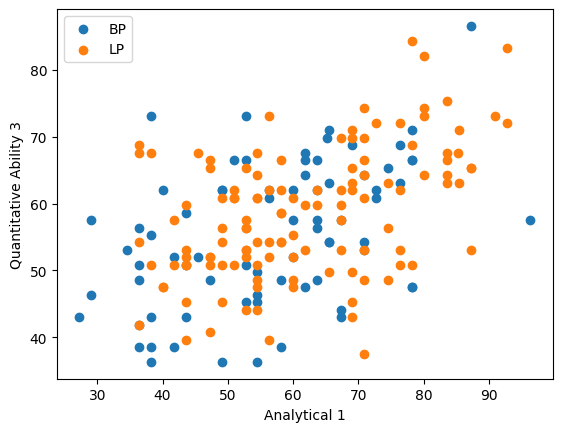

In [122]:
# Extract the two features and class labels
X = df[['Analytical Skills 1', 'Quantitative Ability 3']].values
y = df['Performance'].values

# Create separate arrays for BP and LP classes
X_bp = X[y == 1]
X_lp = X[y == 2]

# Plot the two classes with different markers
plt.scatter(X_bp[:, 0], X_bp[:, 1], marker='o', label='BP')
plt.scatter(X_lp[:, 0], X_lp[:, 1], marker='o', label='LP')

# Add axis labels and legend
plt.xlabel('Analytical 1')
plt.ylabel('Quantitative Ability 3')
plt.legend()
plt.show()

Problem 5:

Use Fisher Discriminant Analysis on the classes BP and LP to project the variables identified in Q1 into a
1-d space. Plot the posterior p(ωi|x) against x for the two classes. Plot the boundary that will minimize the
error for this two-class problem. Comment on the LDA projection in light of the results of Q3.

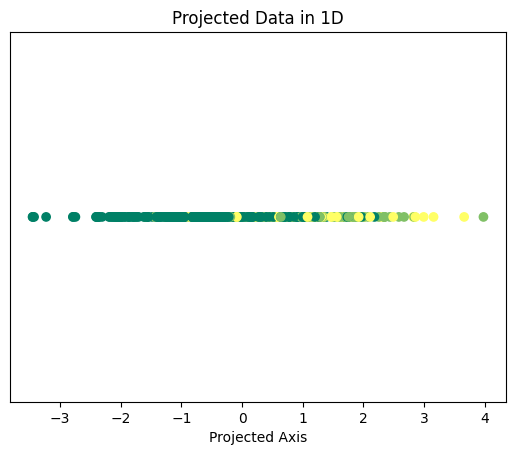

In [123]:

# Create an instance of LinearDiscriminantAnalysis
FDA = LinearDiscriminantAnalysis(n_components=1)

# Fitting the FDA model on the training data
FDA.fit(x_train, y_train)

# Projecting the training data onto the FDA components
x_projected = FDA.transform(x_train)

# Create a scatter plot of the projected data
plt.scatter(x_projected, np.zeros_like(x_projected), c=y_train.values, cmap='summer')

# Setting the x-axis label
plt.xlabel('Projected Axis')

# Setting the y-axis limits
plt.ylim(-0.1, 0.1)

# Remove the y-axis ticks
plt.yticks([])

# Set the plot title
plt.title('Projected Data in 1D')

# Display the plot
plt.show()

In [ ]:
# Scatter plot of posterior probability against class

y_postprob = 

# Creating scatter plots for the predicted class probabilities
plt.scatter(y_postprob[:, 0], np.full((len(y_postprob)), 0), label="BP Class", s=42, color='teal')
plt.scatter(y_postprob[:, 1], np.full((len(y_postprob)), 1), label="LP Class", s=42,color='limegreen')

# Setting the y-axis label
plt.ylabel('x')

# Setting the x-axis label
plt.xlabel('p(ωi|x)')

# Setting the plot title
plt.title('Posterior Probabilities')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


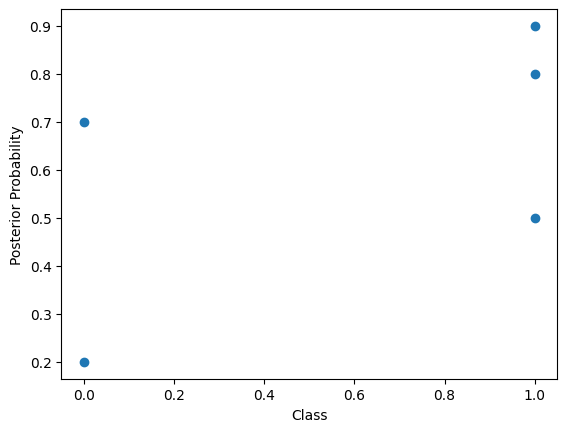

In [165]:
import matplotlib.pyplot as plt

# assuming you have the posterior probabilities and corresponding classes as numpy arrays
posterior_probs = [0.2, 0.5, 0.7, 0.8, 0.9]
classes = [0, 1, 0, 1, 1]

plt.scatter(classes, posterior_probs)
plt.xlabel('Class')
plt.ylabel('Posterior Probability')
plt.show()

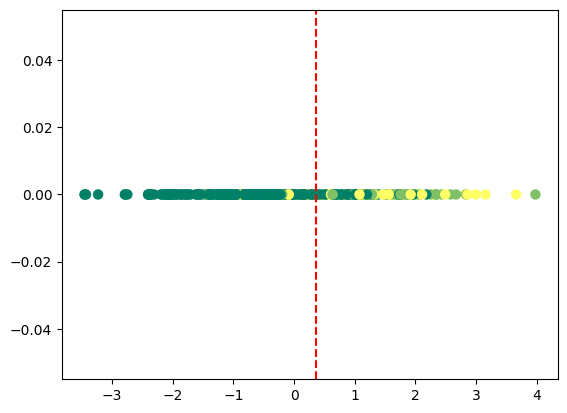

In [127]:
#Plotting the decision boundary


# Get the class labels from y_train
labels = y_train.values

# Plot the projected points with different colors for different classes
plt.scatter(x_projected, np.zeros_like(x_projected), c=labels, cmap='summer', s=42)

# Find the decision boundary as the midpoint between the classes
class_0_mean = np.mean(x_projected[labels == 0])
class_1_mean = np.mean(x_projected[labels == 1])
decision_boundary = (class_0_mean + class_1_mean) / 2

# Plot the decision boundary as a vertical line
plt.axvline(x=decision_boundary, color='red', linestyle='--', label='Decision Boundary')

# Display the plot
plt.show()

In [128]:
# Recognizing the features that are impacting accuracy

# Get the weights and intercepts of features in the classifier
m = FDA.coef_[0]
c = FDA.intercept_[0]

# Convert to absolute values
abs_m = abs(m)
abs_c = abs(c)

# Sort and then assign in descending order since we want highest weighted features
feature_ranking = np.argsort(abs_m)[::-1]
top_features = x_train.iloc[:, feature_ranking[:4]]

print(top_features)

     Year of Completion of college  Degree of study  Gender  Year of Birth
366                              1                1       0              5
178                              1                1       1              5
599                              1                1       1              5
200                              1                1       0              5
424                              1                1       0              5
..                             ...              ...     ...            ...
71                               1                1       1              5
106                              1                1       1              5
271                              1                1       0              6
438                              1                1       0              4
102                              1                1       0              6

[496 rows x 4 columns]


Problem 6:

Build a Neural Network to distinguish between the three classes (ignoring MD which stands for Missing
Data). Start with 1 hidden layer and 3 hidden neurons and sigmoid activation function. Train it using a
training algorithm of your choice on randomly selected 80% of the points. Validate the results on the 20%
of the points not used in training. Plot the error on the training set and validation set against # epochs.
Comment on these results. You may use the in-built commands from MATLAB or any other machine
learning package for this.

In [132]:
X = df.drop(columns = ["Performance"])
y = df["Performance"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target data to one-hot encoding
num_classes = np.max(y) + 1
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_val_encoded = keras.utils.to_categorical(y_val, num_classes)

# Build the neural network model
model = keras.Sequential([
layers.Dense(3, activation='sigmoid', input_shape=(X_train.shape[1],)),
layers.Dense(num_classes, activation='softmax')
])

#setting the learning rate
learning_rate = 0.001

#Deciding the Optimizer
opt = keras.optimizers.Adam(learning_rate = 0.001)

# Compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train_encoded, epochs=25, batch_size=10, validation_data=(X_val,
y_val_encoded))

# Predicting the classes for validation data
y_pred_encoded = model.predict(X_val)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Calculating the accuracy score
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

Epoch 1/25
50/50 [==============================] - 2s 8ms/step - loss: 1.1856 - accuracy: 0.3125 - val_loss: 1.1204 - val_accuracy: 0.3760
Epoch 2/25
50/50 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.4032 - val_loss: 1.0373 - val_accuracy: 0.4000
Epoch 3/25
50/50 [==============================] - 0s 3ms/step - loss: 1.0244 - accuracy: 0.4375 - val_loss: 0.9758 - val_accuracy: 0.7200
Epoch 4/25
50/50 [==============================] - 0s 2ms/step - loss: 0.9903 - accuracy: 0.6452 - val_loss: 0.9506 - val_accuracy: 0.7360
Epoch 5/25
50/50 [==============================] - 0s 3ms/step - loss: 0.9638 - accuracy: 0.6472 - val_loss: 0.9287 - val_accuracy: 0.7280
Epoch 6/25
50/50 [==============================] - 0s 3ms/step - loss: 0.9434 - accuracy: 0.6492 - val_loss: 0.9031 - val_accuracy: 0.7280
Epoch 7/25
50/50 [==============================] - 0s 3ms/step - loss: 0.9265 - accuracy: 0.6452 - val_loss: 0.8854 - val_accuracy: 0.7280
Epoch 8/25
50/50 [==

4/4 [==============================] - 0s 4ms/step - loss: 0.8041 - accuracy: 0.7120


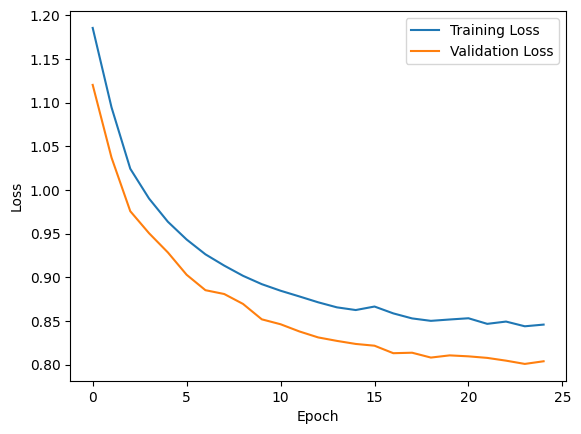

In [133]:
# Check the performance of the model on the test set
test_loss, test_acc = model.evaluate(X_val, y_val_encoded)

# Plotting the training and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

Problem 7:

Repeat using different number of hidden nodes and plot minimum error on validation set vs. # hidden
nodes. Comment on these results.

In [158]:
#Building the mentioned neural network model

X = df.drop('Performance', axis=1)
y = df['Performance']

# split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#convert into one-hot
num_classes = np.max(y_resampled) + 1
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_val_encoded = keras.utils.to_categorical(y_val, num_classes)

# define a function to create and train the neural network
def train_model(num_hidden_nodes):
  model = keras.Sequential([layers.Dense(num_hidden_nodes, activation='sigmoid', input_shape=(X_train.shape[1],)),layers.Dense(num_classes, activation='softmax')])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  #history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=0)
  history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=10, validation_data=(X_val, y_val_encoded))
  return history.history['val_loss'], history.history['val_accuracy']

# define a list of different number of hidden nodes to try
num_hidden_nodes_list = my_list = list(range(1, 101, 10))

Epoch 1/10
50/50 [==============================] - 2s 22ms/step - loss: 1.1602 - accuracy: 0.6250 - val_loss: 1.1063 - val_accuracy: 0.6720
Epoch 2/10
50/50 [==============================] - 1s 14ms/step - loss: 1.0890 - accuracy: 0.6452 - val_loss: 1.0564 - val_accuracy: 0.6960
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 1.0386 - accuracy: 0.6714 - val_loss: 1.0122 - val_accuracy: 0.7120
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 1.0130 - accuracy: 0.6754 - val_loss: 0.9882 - val_accuracy: 0.7120
Epoch 5/10
50/50 [==============================] - 0s 10ms/step - loss: 0.9915 - accuracy: 0.6774 - val_loss: 0.9663 - val_accuracy: 0.7120
Epoch 6/10
50/50 [==============================] - 0s 10ms/step - loss: 0.9730 - accuracy: 0.6774 - val_loss: 0.9472 - val_accuracy: 0.7120
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.9567 - accuracy: 0.6774 - val_loss: 0.9284 - val_accuracy: 0.7120
Epoch 8/10
50/50

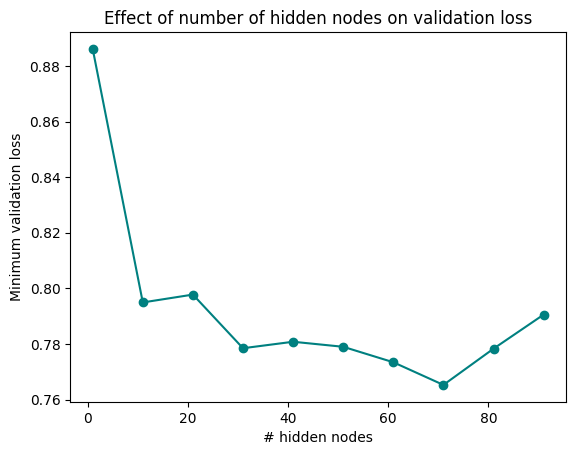

In [159]:
#Training and plotting the model results


# train and evaluate the model with different number of hidden nodes
val_loss_list = []
val_acc_list = []

for num_hidden_nodes in num_hidden_nodes_list:
  val_loss, val_acc = train_model(num_hidden_nodes)
  val_loss_list.append(min(val_loss))
  val_acc_list.append(max(val_acc))

# plot the minimum validation loss vs. the number of hidden nodes
plt.plot(num_hidden_nodes_list, val_loss_list, 'o-', color='teal')

plt.xlabel('# hidden nodes')
plt.ylabel('Minimum validation loss')

plt.title('Effect of number of hidden nodes on validation loss')
plt.show()

Problem 8:

For the optimal number of hidden nodes, interpret the input-to-hidden node weight matrix and its relation
to results of Q3 and Q5.

Epoch 1/25
18/18 [==============================] - 1s 18ms/step - loss: 1.2393 - accuracy: 0.3220 - val_loss: 1.0930 - val_accuracy: 0.4222
Epoch 2/25
18/18 [==============================] - 0s 4ms/step - loss: 1.1017 - accuracy: 0.3616 - val_loss: 1.1396 - val_accuracy: 0.2667
Epoch 3/25
18/18 [==============================] - 0s 5ms/step - loss: 1.0730 - accuracy: 0.4124 - val_loss: 1.1003 - val_accuracy: 0.4000
Epoch 4/25
18/18 [==============================] - 0s 5ms/step - loss: 1.0519 - accuracy: 0.4746 - val_loss: 1.1228 - val_accuracy: 0.4444
Epoch 5/25
18/18 [==============================] - 0s 5ms/step - loss: 1.0407 - accuracy: 0.4972 - val_loss: 1.1069 - val_accuracy: 0.4000
Epoch 6/25
18/18 [==============================] - 0s 5ms/step - loss: 1.0334 - accuracy: 0.5085 - val_loss: 1.1208 - val_accuracy: 0.4000
Epoch 7/25
18/18 [==============================] - 0s 5ms/step - loss: 1.0284 - accuracy: 0.5028 - val_loss: 1.1450 - val_accuracy: 0.3778
Epoch 8/25
18/18 [=

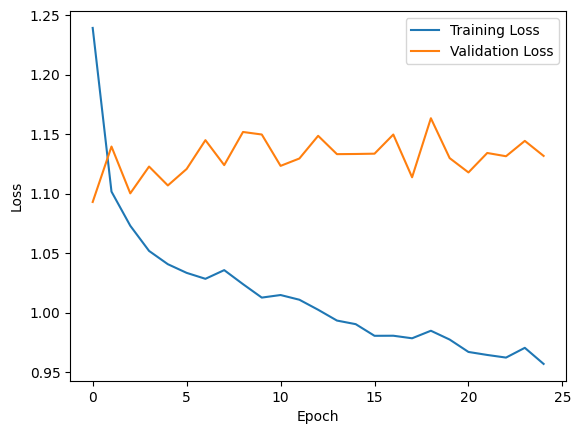

In [139]:
#A function to iterate through different number of hidden nodes. 
X = df.drop(columns = ["Performance"])
y = df["Performance"]

# Instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to X and y
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2,
random_state=42)

# Convert the target data to one-hot encoding
num_classes = np.max(y_resampled) + 1
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_val_encoded = keras.utils.to_categorical(y_val, num_classes)

# Build the neural network model
model = keras.Sequential([
layers.Dense(101, activation='sigmoid', input_shape=(X_train.shape[1],)),
layers.Dense(num_classes, activation='softmax')
])

#set the learning rate
learning_rate = 0.001

#Choose the Optimizer
opt = keras.optimizers.Adam(learning_rate = learning_rate)

# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=25, batch_size=10, validation_data=(X_val,y_val_encoded))

# Predict the classes for validation data
y_pred_encoded = model.predict(X_val)
y_pred = np.argmax(y_pred_encoded, axis=1)
test_loss, test_acc = model.evaluate(X_val, y_val_encoded)

print('Test accuracy:', test_acc)
# Plot the training and validation loss over time

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [142]:
#Estimating the model weights and respective features

# Retrieve the model weights using the model layer
weights = model.layers[0].get_weights()[0]

# Sum up all the weights of each feature on every neuron
sumweight = abs(weights).sum(axis=1)

# Create a 2D array to store feature columns and their corresponding weights
feature_column = []
cols = [i for i in df.columns]
cols.remove('Performance')

# Iterate over each feature and its corresponding weight
for i in range(len(sumweight)):
  feature_column.append([cols[i], sumweight[i]])

# Sort the feature columns based on their weights in descending order
feature_column.sort(key=lambda x: x[1], reverse=True)

# Print the feature columns and their corresponding weights
for i in feature_column:
  print(f"{i[0]} - {i[1]}")


Candidate ID - 12.271949768066406
Domain Skills 1 - 12.181154251098633
12th Completion year - 11.895264625549316
10th Completion Year - 11.872221946716309
Quantitative Ability 2 - 11.835701942443848
Domain Skills 2 - 11.780179977416992
State (Location) - 11.680562019348145
English 1 - 11.571528434753418
Gender - 11.417744636535645
12th percentage - 11.381863594055176
English 3 - 11.309925079345703
Specialization in study - 11.299087524414062
Analytical Skills 2 - 11.261906623840332
Domain Test 4 - 11.139568328857422
Analytical Skills 1 - 11.078080177307129
Number of characters in Original Name - 10.998658180236816
10th percentage - 10.993264198303223
Name - 10.952081680297852
College percentage - 10.940486907958984
English 4 - 10.823869705200195
Quantitative Ability 3 - 10.80798053741455
Quantitative Ability 4 - 10.770121574401855
Analytical Skills 3 - 10.68714714050293
Year of Completion of college - 10.653292655944824
Quantitative Ability 1 - 10.618630409240723
Domain Test 3 - 10.615

Problem 9:

Repeat step 6 using SVM. Select a Gaussian Kernel, and use a grid search
(http://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf). Comment on the results, and compare them to
Q3, Q5 and Q8.

In [151]:
data = df.iloc[:, :-1]
label = df.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=0.2, random_state=42)

# Define the SVM model
svm_model = SVC(kernel='rbf', decision_function_shape='ovr') #Radial Basis Function is also called as Gaussian Kernel

# Set up the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_val)
target_names = ['BP', 'MP', 'LP']

print(classification_report(y_val, y_pred, target_names=target_names, zero_division=1))

Best hyperparameters:  {'C': 0.1, 'gamma': 0.1}
              precision    recall  f1-score   support

          BP       0.71      1.00      0.83        89
          MP       1.00      0.00      0.00        12
          LP       1.00      0.00      0.00        24

    accuracy                           0.71       125
   macro avg       0.90      0.33      0.28       125
weighted avg       0.79      0.71      0.59       125



In [152]:
# Assuming X is your input data and y is the corresponding labels
svm_model = SVC()
svm_model.fit(X, y)

# Calculate feature importances using permutation importance
result = permutation_importance(svm_model, X, y, n_repeats=10, random_state=42)

# Retrieve the importances and feature names
impfeature = result.importances_mean
feature_names = X.columns

# Print the top features and their importances
indices = impfeature.argsort()[::-1]

for idx in indices:
  print(f"{feature_names[idx]}: {impfeature[idx]}")

Analytical Skills 3: 0.0
Analytical Skills 2: 0.0
Name: 0.0
Number of characters in Original Name: 0.0
Month of Birth: 0.0
Year of Birth: 0.0
Gender: 0.0
State (Location): 0.0
10th percentage: 0.0
12th percentage: 0.0
10th Completion Year: 0.0
12th Completion year: 0.0
Degree of study: 0.0
Specialization in study: 0.0
College percentage: 0.0
Year of Completion of college: 0.0
English 1: 0.0
English 2: 0.0
English 3: 0.0
English 4: 0.0
Quantitative Ability 1: 0.0
Quantitative Ability 2: 0.0
Quantitative Ability 3: 0.0
Quantitative Ability 4: 0.0
Domain Skills 1: 0.0
Domain Skills 2: 0.0
Domain Test 3: 0.0
Domain Test 4: 0.0
Analytical Skills 1: 0.0
Candidate ID: 0.0
